# **CNN with Data Augmentation and Transfer Learning**

*Objective: Enhance CNN performance using data augmentation and transfer learning techniques.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

## **Load Dataset and Data Preprocessing**

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 1)


In [ ]:
# normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test,num_classes)
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [ ]:
x_train_aug, x_val, y_train_aug, y_val = train_test_split(x_train, y_train, test_size=0.2)

def resize_images(image):
  return tf.image.resize(image, [32, 32])

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

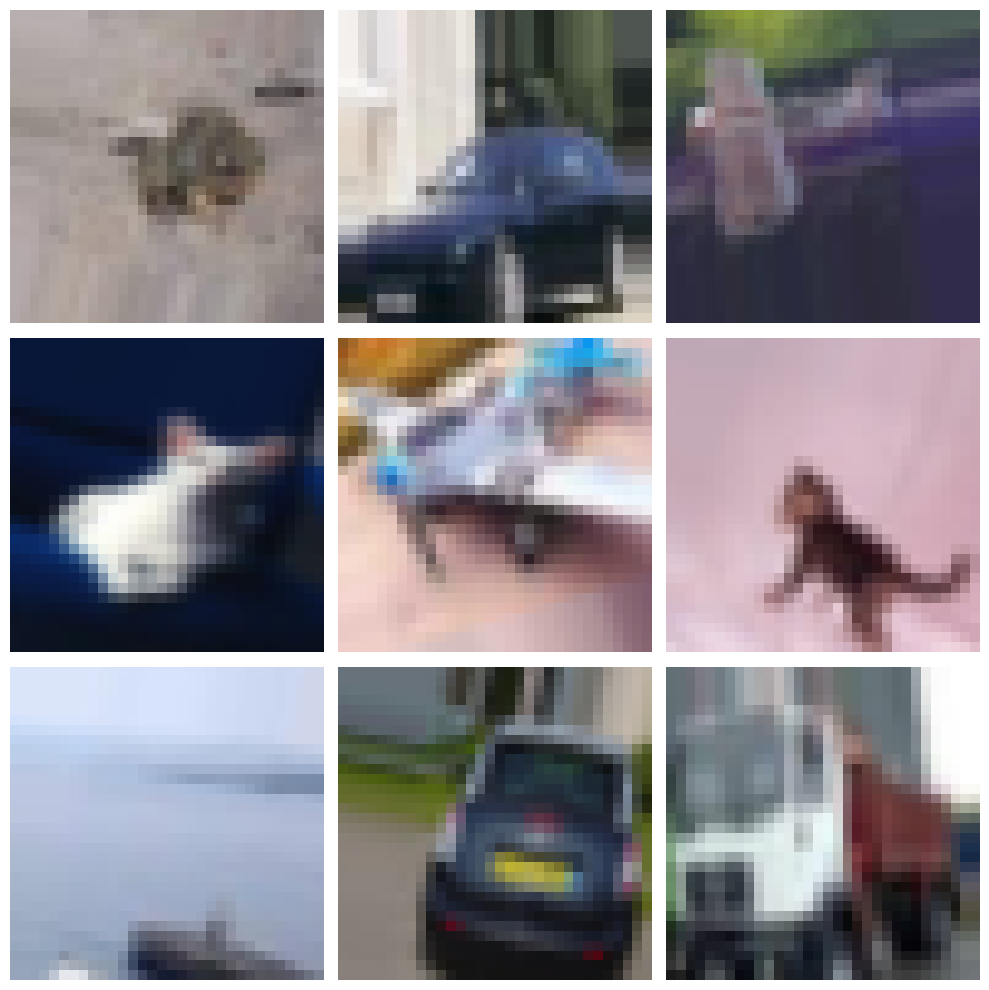

In [ ]:
batch_size = 64

train_generator = train_datagen.flow(
    x_train_aug, y_train_aug,
    batch_size=batch_size,
)

val_generator = val_datagen.flow(
    x_val, y_val,
    batch_size=batch_size,
)

def visualize(generator, num_images=9):
  augmented_images, _ = next(generator)

  plt.figure(figsize=(10, 10))
  for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

visualize(train_generator)

## **Transfer Learning**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, Model
from tensorflow.keras.applications import ResNet50

input_shape = (32, 32, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,696,138 (98.02 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## **Initial Training**

In [ ]:
epochs_initial = 10

history_initial = model.fit(
    train_generator,
    epochs=epochs_initial,
    validation_data=val_generator,
    steps_per_epoch=len(x_train_aug) // batch_size,
    validation_steps=len(x_val) // batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 252s 387ms/step - accuracy: 0.1246 - loss: 2.5090 - val_accuracy: 0.2148 - val_loss: 2.1759
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1875 - val_loss: 2.2203
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 244s 364ms/step - accuracy: 0.1557 - loss: 2.2180 - val_accuracy: 0.2325 - val_loss: 2.1308
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 2.0791
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 227s 363ms/step - accuracy: 0.1646 - loss: 2.1996 - val_accuracy: 0.2441 - val_loss: 2.0754
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.9851
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 366ms/step - accuracy: 0.1737 - loss: 2.1814 - val_accuracy: 0.2538 - val_loss: 2.0525
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 2.0001
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 307s 438ms/step - accuracy: 0

In [ ]:
base_model.trainable = True

fine_tune_at = len(base_model.layers) - 50

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs_fine = 10

history_fine = model.fit(
    train_generator,
    epochs=epochs_fine,
    steps_per_epoch=len(x_train_aug) // batch_size,
    validation_steps=len(x_val) // batch_size
)

Epoch 1/10
480/625 ━━━━━━━━━━━━━━━━━━━━ 6:31 3s/step - accuracy: 0.1313 - loss: 2.8592

## **Define Callbacks**

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

class ValidationPrecision(callbacks.Callback):
    def __init__(self, validation_data):
        super(ValidationPrecision, self).__init__()
        self.validation_data = validation_data
        self.precision = tf.keras.metrics.Precision()

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        val_predictions = np.argmax(self.model.predict(val_x), axis=1) # get model predictions
        val_labels = np.argmax(val_y, axis=1)
        self.precision.update_state(val_labels, val_predictions) #update precision
        precision_result = self.precision.result().numpy() #precision result
        print(f' — val_precision: {precision_result:.4f}')
        self.precision.reset_state() # reset

validation_precision = ValidationPrecision(validation_data=(x_test, y_test))

from tensorflow.keras import backend as K

class LearningRateLogger(callbacks.Callback):
    def __init__(self):
        super(LearningRateLogger, self).__init__()
        self.lrs = []  # learning rates

    def on_epoch_end(self, epoch, logs=None):
        lr = K.eval(self.model.optimizer.learning_rate)
        self.lrs.append(lr)
        print(f" — Learning Rate: {lr:.6f}")

learning_rate_log = LearningRateLogger()
callback_list = [early_stop, model_checkpoint, reduce_lr, validation_precision, learning_rate_log]

## **Adaptive Learning Rate**

In [ ]:
initial_lr = 1e-3
optimizer = optimizers.Adam(learning_rate=initial_lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## **Training and Evaluation**

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=callback_list,
    verbose = 1
)

best_model = models.load_model('best_model.keras')
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
 — val_precision: 0.9468
 — Learning Rate: 0.001000
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 207ms/step - accuracy: 0.3731 - loss: 1.9850 - val_accuracy: 0.5580 - val_loss: 1.2542 - learning_rate: 0.0010
Epoch 2/50
511/782 ━━━━━━━━━━━━━━━━━━━━ 55s 204ms/step - accuracy: 0.5709 - loss: 1.2076

## **Deliverables**

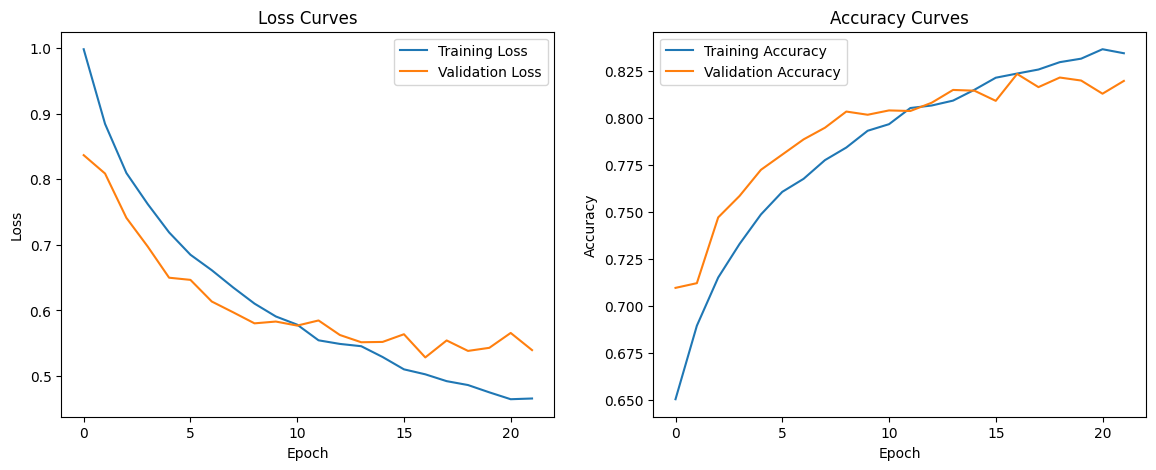

KeyError: 'lr'

<Figure size 700x500 with 0 Axes>

In [ ]:
# training and validation loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# learning rate
plt.figure(figsize=(7,5))
plt.plot(history.history['lr'], label='Learning Rate')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


Callbacks: We used four different callbacks. Earlystopping prevents overfitting by stopping training when the models stops improving on the validation set. Modelcheckpoint saves the best performing model on validation loss. ReduceLROnPlateau lowers learning rate and dynamically adjusts when the performance plateaus. Lasltly we have a custom callback that provides insight in the model performance.

We utilize adam optimizer to adjust the learning rate for each parameter based on the first estimates of first and second moments of gradients.


Some cites I used for this code creation:
1. https://sjmiller8182.github.io/posts/2020/11/keras-callbacks/
2. https://www.programcreek.com/python/example/119600/tensorflow.keras.backend.eval
